## Tic-Tac-Toe Agent
​
In this notebook, you will learn to build an RL agent (using Q-learning) that learns to play Numerical Tic-Tac-Toe with odd numbers. The environment is playing randomly with the agent, i.e. its strategy is to put an even number randomly in an empty cell. The following is the layout of the notebook:
        - Defining epsilon-greedy strategy
        - Tracking state-action pairs for convergence
        - Define hyperparameters for the Q-learning algorithm
        - Generating episode and applying Q-update equation
        - Checking convergence in Q-values

#### Importing libraries
Write the code to import Tic-Tac-Toe class from the environment file

In [57]:
from TCGame_Env import TicTacToe
import collections
import numpy as np
import random
import pickle
import time
from matplotlib import pyplot as plt

In [58]:
# Function to convert state array into a string to store it as keys in the dictionary
# states in Q-dictionary will be of form: x-4-5-3-8-x-x-x-x
#   x | 4 | 5
#   ----------
#   3 | 8 | x
#   ----------
#   x | x | x

def Q_state(state):

    return ('-'.join(str(e) for e in state)).replace('nan','x')

In [59]:
# Defining a function which will return valid (all possible actions) actions corresponding to a state
# Important to avoid errors during deployment.

def valid_actions(state):

    valid_Actions = []
    
    valid_Actions = [i for i in env.action_space(state)[0]] ###### -------please call your environment as env
    return valid_Actions

In [60]:
# Defining a function which will add new Q-values to the Q-dictionary. 
def add_to_dict(state):
    state1 = Q_state(state)
    
    valid_act = valid_actions(state)
    if state1 not in Q_dict.keys():
        for action in valid_act:
            Q_dict[state1][action]=0

#### Epsilon-greedy strategy - Write your code here

(you can build your epsilon-decay function similar to the one given at the end of the notebook)

In [61]:
# Defining epsilon-greedy policy. You can choose any function epsilon-decay strategy
def epsilon_greedy(state, time):    
    epsilon = min_epsilon + (max_epsilon - min_epsilon) * np.exp(-decay_rate*time)
    # print(epsilon)
    z = np.random.random()
        
    if z > epsilon:        
        state1 = Q_state(state)
        action = max(Q_dict[state1],key=Q_dict[state1].get)   #Exploitation: this gets the action corresponding to max q-value of current state
    else:        
        possible_action = [i for i in env.action_space(state)[0]]        
        action = possible_action[np.random.choice(range(len(possible_action)))]    #Exploration: randomly choosing and action
    
    return action


#### Tracking the state-action pairs for checking convergence - write your code here

In [62]:
# Initialise Q_dictionary as 'Q_dict' and States_tracked as 'States_track' (for convergence)
Q_dict = collections.defaultdict(dict)
States_track =collections.defaultdict(dict)

In [63]:
# Initialise states to be tracked
def initialise_tracking_states():
    Sample_Qvalues = [('x-x-x-x-x-x-x-x-x',(6,5)),('x-x-x-x-x-x-x-x-x',(1,9)),
                       ('x-x-x-x-x-x-x-x-x',(1,1)),('x-x-x-x-x-x-x-x-x',(6,3))]    #select some 4 Q-values
    for q_values in Sample_Qvalues:
        state = q_values[0]
        action = q_values[1]
        States_track[state][action] = []
  
  
  

In [64]:
#Defining a function to save the Q-dictionary as a pickle file

def save_obj(obj, name ):
    with open(name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)

In [65]:
def save_tracking_states():
    for state in States_track.keys():
        for action in States_track[state].keys():
            if state in Q_dict and action in Q_dict[state]:
                States_track[state][action].append(Q_dict[state][action])

In [66]:
initialise_tracking_states()

#### Define hyperparameters  ---write your code here

In [67]:
EPISODES = 5000000
LR = 0.01                   # learning rate
GAMMA = 0.9                # discount factor

max_epsilon = 1.0
min_epsilon = 0.001
decay_rate = 0.001        # epsilon decay rate
threshold = 30

### Q-update loop ---write your code here

In [68]:
start_time = time.time()

for episode in range(EPISODES):
    ##### Start writing your code from the next line
    if episode % 100000 == 0:
        print(episode)
    env = TicTacToe() # call the environment
    curr_state = env.state    
    done = False  
    add_to_dict(curr_state)  # adding the current state to dictionary

    while done != True:  
        curr_state1 = Q_state(curr_state)
        curr_action = epsilon_greedy(curr_state, episode)   # applying epislon method
        next_state, reward, done = env.step(curr_state, curr_action) # getting rewar
        next_state_temp = Q_state(next_state)
        add_to_dict(next_state)

        # Updating rules
        if done != True:
            max_next = max(Q_dict[next_state_temp],key=Q_dict[next_state_temp].get)  
                #this gets the action corresponding to max q-value of next state
            Q_dict[curr_state1][curr_action] += LR * ((reward + (GAMMA*(Q_dict[next_state_temp][max_next])))
                                                      - Q_dict[curr_state1][curr_action] ) 
        else:
            Q_dict[curr_state1][curr_action] += LR * ((reward - Q_dict[curr_state1][curr_action]))

        # navigating to next state
        curr_state = next_state
        
        if ((episode+1)%threshold)==0:
            save_tracking_states()
    
elapsed_time = time.time() - start_time
save_obj(Q_dict,'Policy')
save_obj(States_track,'States_tracked')   


0
100000
200000
300000
400000
500000
600000
700000
800000
900000
1000000
1100000
1200000
1300000
1400000
1500000
1600000
1700000
1800000
1900000
2000000
2100000
2200000
2300000
2400000
2500000
2600000
2700000
2800000
2900000
3000000
3100000
3200000
3300000
3400000
3500000
3600000
3700000
3800000
3900000
4000000
4100000
4200000
4300000
4400000
4500000
4600000
4700000
4800000
4900000


#### Check the Q-dictionary

In [69]:
m = 0
for state in Q_dict:
    for pos in Q_dict[state]:
        m1 = max(Q_dict[state],key=Q_dict[state].get)
        if (Q_dict[state][pos] > m):
            print(Q_dict[state][pos],state,pos)
            m= Q_dict[state][pos]

5.145688389750081 x-x-x-x-x-x-x-x-x (2, 9)
6.925292725597658 x-x-9-x-8-x-x-x-x (0, 7)
7.310930782689716 x-x-9-x-x-8-x-x-x (0, 1)
7.882195796512441 x-6-9-x-x-x-x-x-x (6, 1)
9.999999999999911 1-x-9-x-4-x-x-6-x (1, 5)


In [70]:
# try checking for one of the states - that which action your agent thinks is the best  -----This will not be evaluated

In [71]:
win = 0
loss = 0
tie = 0
test_count = 10000
for i in range(test_count):
    env = TicTacToe()    
    curr_state = env.state
    curr_action = random.choice(list(env.action_space(curr_state)[0]))
    curr_state, reward, terminated = env.step(curr_state, curr_action)
    time_step = 0    
    terminated = False
    temp_state = np.reshape(['_' if np.isnan(x) else x for x in curr_state ],(3,3))    
    while not terminated:    
        curr_state_key = Q_state(curr_state)
        if curr_state_key in Q_dict:            
            curr_action = max(Q_dict[curr_state_key], key=Q_dict[curr_state_key].get)
        else:      
            #print('Random',curr_state_key)
            curr_action = random.choice(list(env.action_space(curr_state)[0]))        

        curr_state, reward, terminated = env.step(curr_state, curr_action)       
    if reward == 10:
        win += 1
    elif reward == -10:
        loss += 1
    else:
        tie += 1
print('Agent win :', round(win*100/test_count,2),'%')
print('Agent loss :', round(loss*100/test_count,2),'%')
print('Agent tie :', round(tie*100/test_count,2),'%')

Agent win : 45.31 %
Agent loss : 20.95 %
Agent tie : 33.74 %


In [72]:
env = TicTacToe()    
curr_state = env.state
curr_action = random.choice(list(env.action_space(curr_state)[0]))
curr_state, reward, terminated = env.step(curr_state, curr_action)
time_step = 0    
terminated = False
temp_state = np.reshape(['_' if np.isnan(x) else x for x in curr_state ],(3,3))
print(temp_state)
print('-'*50)
while not terminated:    
    curr_state_key = Q_state(curr_state)
    if curr_state_key in Q_dict:            
        curr_action = max(Q_dict[curr_state_key], key=Q_dict[curr_state_key].get)
    else:      
        #print('Random',curr_state_key)
        curr_action = random.choice(list(env.action_space(curr_state)[0]))        

    curr_state, reward, terminated = env.step(curr_state, curr_action)
    temp_state = np.reshape(['_' if np.isnan(x) else x for x in curr_state ],(3,3))
    print(temp_state)
    print('-'*50)
if reward == 10:
    print('Agent won')
elif reward == -10:
    print('Envornment won')
else:
    print('Tie')

[['_' '9' '_']
 ['_' '_' '_']
 ['_' '_' '4']]
--------------------------------------------------
[['_' '9' '_']
 ['_' '8' '_']
 ['_' '7' '4']]
--------------------------------------------------
[['3' '9' '_']
 ['_' '8' '_']
 ['_' '7' '4']]
--------------------------------------------------
Agent won


#### Check the states tracked for Q-values convergence
(non-evaluative)

In [73]:
# Write the code for plotting the graphs for state-action pairs tracked

In [74]:
len(States_track)

1

x-x-x-x-x-x-x-x-x (6, 5)


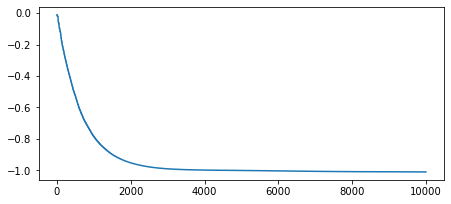

x-x-x-x-x-x-x-x-x (1, 9)


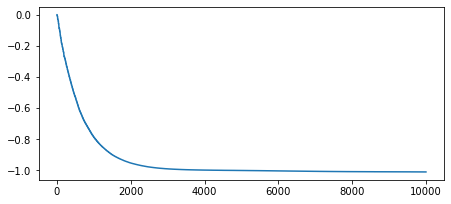

x-x-x-x-x-x-x-x-x (1, 1)


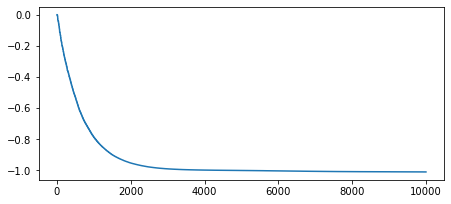

x-x-x-x-x-x-x-x-x (6, 3)


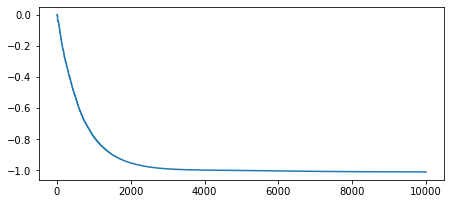

In [82]:
for state in States_track:
    for pos in States_track[state]:
        print(state,pos)
        plt.figure(0, figsize=(16,7))

        x_axis = np.asarray(range(0, len(States_track[state][pos][:10000])))
        plt.subplot(221)
        plt.plot(x_axis,np.asarray(States_track[state][pos][:10000]))
        plt.show()

### Epsilon - decay check

In [76]:
max_epsilon = 1.0
min_epsilon = 0.001
time = np.arange(0,5000000)
epsilon = []
for i in range(0,5000000):
    epsilon.append(min_epsilon + (max_epsilon - min_epsilon) * np.exp(-0.000001*i))

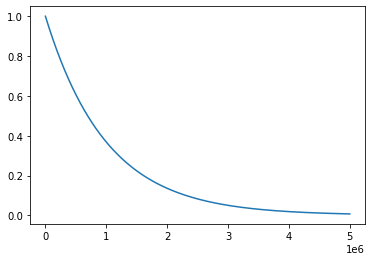

In [77]:
plt.plot(time, epsilon)
plt.show()

# Play against computer

In [13]:
import copy

In [3]:
with open('Policy.pkl','rb') as handle:
    Q_dict = pickle.load(handle)

In [22]:
env = TicTacToe()    
curr_state = env.state
curr_action = random.choice(list(env.action_space(curr_state)[0]))
temp_state = copy.deepcopy(curr_state)
temp_state[curr_action[0]] = curr_action[1]
temp_state = np.reshape(['_' if np.isnan(x) else x for x in temp_state ],(3,3))
print(temp_state)

[['_' '7' '_']
 ['_' '_' '_']
 ['_' '_' '_']]


In [11]:
pos = random.choice(env.allowed_positions(env.state))
type(pos

0

In [56]:
env = TicTacToe()    
curr_state = env.state
curr_action = random.choice(list(env.action_space(curr_state)[0]))
print(curr_action)
temp_state = copy.deepcopy(curr_state)
temp_state[curr_action[0]] = curr_action[1]
temp_state = np.reshape(['_' if np.isnan(x) else x for x in temp_state ],(3,3))
print(temp_state)
print('-'*50)
pos = int(input('Please enter position ('+ ",".join(str(x) for x in env.allowed_positions(env.state) if x != curr_action[0])+'):'))
val = int(input('Please enter value ('+ ",".join(str(x) for x in env.allowed_values(env.state)[1])+'):'))

curr_state, reward, terminated = env.computer_move(curr_state, curr_action,pos,val)
time_step = 0    
terminated = False
temp_state = np.reshape(['_' if np.isnan(x) else x for x in curr_state ],(3,3))
print(temp_state)
print('-'*50)

while not terminated:    
    curr_state_key = Q_state(curr_state)
    if curr_state_key in Q_dict:            
        curr_action = max(Q_dict[curr_state_key], key=Q_dict[curr_state_key].get)
    else:      
        print('Random',curr_state_key)
        curr_action = random.choice(list(env.action_space(curr_state)[0]))
        
    temp_state = copy.deepcopy(curr_state)
    temp_state[curr_action[0]] = curr_action[1]
    temp_state = np.reshape(['_' if np.isnan(x) else x for x in temp_state ],(3,3))
    print(temp_state)
    print('-'*50)
    if len(env.allowed_positions(env.state)) == 0:
        break
    pos = int(input('Please enter position ('+ ",".join(str(x) for x in env.allowed_positions(env.state) if x != curr_action[0])+'):'))
    val = int(input('Please enter value ('+ ",".join(str(x) for x in env.allowed_values(env.state)[1])+'):'))

    curr_state, reward, terminated = env.computer_move(curr_state, curr_action,pos,val)    
    temp_state = np.reshape(['_' if np.isnan(x) else x for x in curr_state ],(3,3))
    print(temp_state)
    print('-'*50)
    

if reward == 10:
    print('Computer won')
elif reward == -10:
    print('You won')
else:
    print('Tie')

(2, 1)
[['_' '_' '1']
 ['_' '_' '_']
 ['_' '_' '_']]
--------------------------------------------------
Please enter position (0,1,3,4,5,6,7,8):0
Please enter value (2,4,6,8):4
[['4' '_' '1']
 ['_' '_' '_']
 ['_' '_' '_']]
--------------------------------------------------
[['4' '_' '1']
 ['7' '_' '_']
 ['_' '_' '_']]
--------------------------------------------------
Please enter position (1,4,5,6,7,8):7
Please enter value (2,6,8):6
[['4' '_' '1']
 ['7' '_' '_']
 ['_' '6' '_']]
--------------------------------------------------
[['4' '_' '1']
 ['7' '_' '5']
 ['_' '6' '_']]
--------------------------------------------------
Please enter position (1,4,6,8):8
Please enter value (2,8):2
[['4' '_' '1']
 ['7' '_' '5']
 ['_' '6' '2']]
--------------------------------------------------
Random 4-x-1-7-x-5-x-6-2
[['4' '_' '1']
 ['7' '_' '5']
 ['9' '6' '2']]
--------------------------------------------------
Please enter position (1,4):1
Please enter value (8):8
[['4' '8' '1']
 ['7' '_' '5']
 ['